# Application of supervised learning

## Dataset presentation

**Short Description** : The chosen dataset contains Spotify tracks as the samples. For each sample we have the audio features as well as the artist, album and track name. Each track is also labeled with a genre, which allows us to explore how well musical features can predict the stylistic category of a song. These features are automatically produced by Spotify’s audio analysis tools and allow for a data-driven view of music beyond tags or listener opinions.

**Link** : https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

**Features Presentation** : Reffering to the HuggingFace card of the dataset, here is the list of features :

**[ track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre ]**

And a description of the features that may be not trivial:

- **popularity** : The popularity of a track is a value between 0 and 100 computed by an algorithm, with 100 being the most popular.

- **danceability** : Danceability is a float between 0.0 and 1.0 that describes how suitable a track is for dancing based on a combination of musical elements.

- **energy** : Energy is a float between 0.0 and 1.0 and represents tracks that feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- **loudness** : The overall loudness of a track in decibels (dB).

- **mode** : Major is represented by 1 and minor is 0.

- **speechiness** : Speechiness is a float between 0.0 and 1.0 and represents the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words.

- **acousticness** : Acousticness is a float between 0.0 and 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **instrumentalness** : Instrumentalness is a float between 0.0 and 1.0 and represents whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

- **liveness** : Liveness is a float between 0.0 and 1.0 and represents the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

- **valence** : Liveness is a float between 0.0 and 1.0 and represents the musical positiveness of a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo** : The overall estimated tempo (speed of pace) of a track in beats per minute (BPM).

- **time_signature** : An estimated time signature. The time signature is a music convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

# Problem to solve

We want to predict the genre of a music track based on its audio features. This is a classification problem, where the target variable is the track’s genre, and the input features are the various audio features.

**Why this problem?**

Solving this problem could have a value in industry for:

- Recommendation systems.

- Music discovery platforms can benefit by organizing tracks into better genre-specific playlists.

- Independent artists who may not have explicit genre tags can have their music correctly placed in the right category using algorithmic prediction.

- Search and filtering functionalities can become more robust when genres are predicted based on actual sound properties instead of relying only on metadata.

By training a classification model on this dataset, we aim to test how well a machine learning model can recognize musical styles purely based on how the tracks sound, independently of artist names or song titles.

# Dataset Analysis

provide general analysis of the dataset, that studies its statistical properties,
outliers, correlation matrices, or any other interesting analysis. You may pro-
duce visualizations.

In [113]:
from datasets import load_dataset

ds = load_dataset("maharshipandya/spotify-tracks-dataset")['train']
ds

Dataset({
    features: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'],
    num_rows: 114000
})

In [114]:
df = ds.to_pandas()
df = df.drop(columns=['Unnamed: 0'])
df = df.drop_duplicates()
df = df.dropna()
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [115]:
df[df['track_genre'] == 'techno']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.093300,0.000927,0.1150,0.1660,100.966,4,techno
109001,0b6wdul3A5sQNpIOv03OxP,Duke Dumont,Ocean Drive,Ocean Drive,72,206320,False,0.686,0.718,8,-5.054,0,0.0431,0.006370,0.000703,0.1190,0.5570,115.026,4,techno
109002,0zoGVO4bQXG8U6ChKwNgeg,Taeko Onuki,MIGNONNE (Mastered by Bernie Grundman),4:00A.M.,70,336960,False,0.631,0.644,10,-10.810,0,0.0348,0.341000,0.000411,0.0877,0.8610,103.376,4,techno
109003,6uBhi9gBXWjanegOb2Phh0,Zedd;Alessia Cara,Stay,Stay,76,210090,False,0.690,0.622,5,-5.025,0,0.0622,0.253000,0.000000,0.1160,0.5440,102.040,4,techno
109004,5aUSEPNd3m5xliFK4pn5mU,Zedd;Kehlani,Good Thing (with Kehlani),Good Thing (with Kehlani),68,210901,True,0.693,0.564,1,-3.857,0,0.0378,0.399000,0.000000,0.0409,0.5740,185.913,3,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1910z5NqrGoJ8SuKWNu19D,Scooter,I Want You to Stream!,Bora Bora Bora - Live,25,230250,False,0.726,0.875,9,-5.957,0,0.1930,0.203000,0.001510,0.5680,0.5230,139.955,4,techno
109996,2MgcPgxFvAlJCVITsEghCI,Ruffneck;Yavahn;Sharam Jey;Kolombo,Everybody Be Somebody: All The Classics And...,"Everybody Be Somebody - Sharam Jey, Kolombo Remix",24,252524,False,0.875,0.511,6,-6.677,0,0.0474,0.204000,0.044500,0.1390,0.5870,122.169,4,techno
109997,3Rn21K5Te3TUM0AcFtisuX,Marshall Masters,Thunderdome Die Hard II (Digital Version),Return To Zero - The Mystery Land Anthem,25,120110,False,0.679,0.866,8,-9.691,1,0.0719,0.000038,0.755000,0.9560,0.0457,147.086,4,techno
109998,3P5xhGZ3c9tOmyvpiTAvVn,Paul Elstak,b2s Presents Paul Elstak,The Dj’s Pumping - Freestyle Edit,24,179175,False,0.602,0.933,10,-4.886,1,0.0471,0.001720,0.032500,0.3720,0.5190,150.047,4,techno


In [116]:
# Drop useless features
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [117]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le2 = LabelEncoder()

numeric_df = df.select_dtypes(include=['number'])

numeric_df = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name'])
numeric_df['track_genre'] = le.fit_transform(df['track_genre'])
numeric_df['explicit'] = le2.fit_transform(df['explicit'])
numeric_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


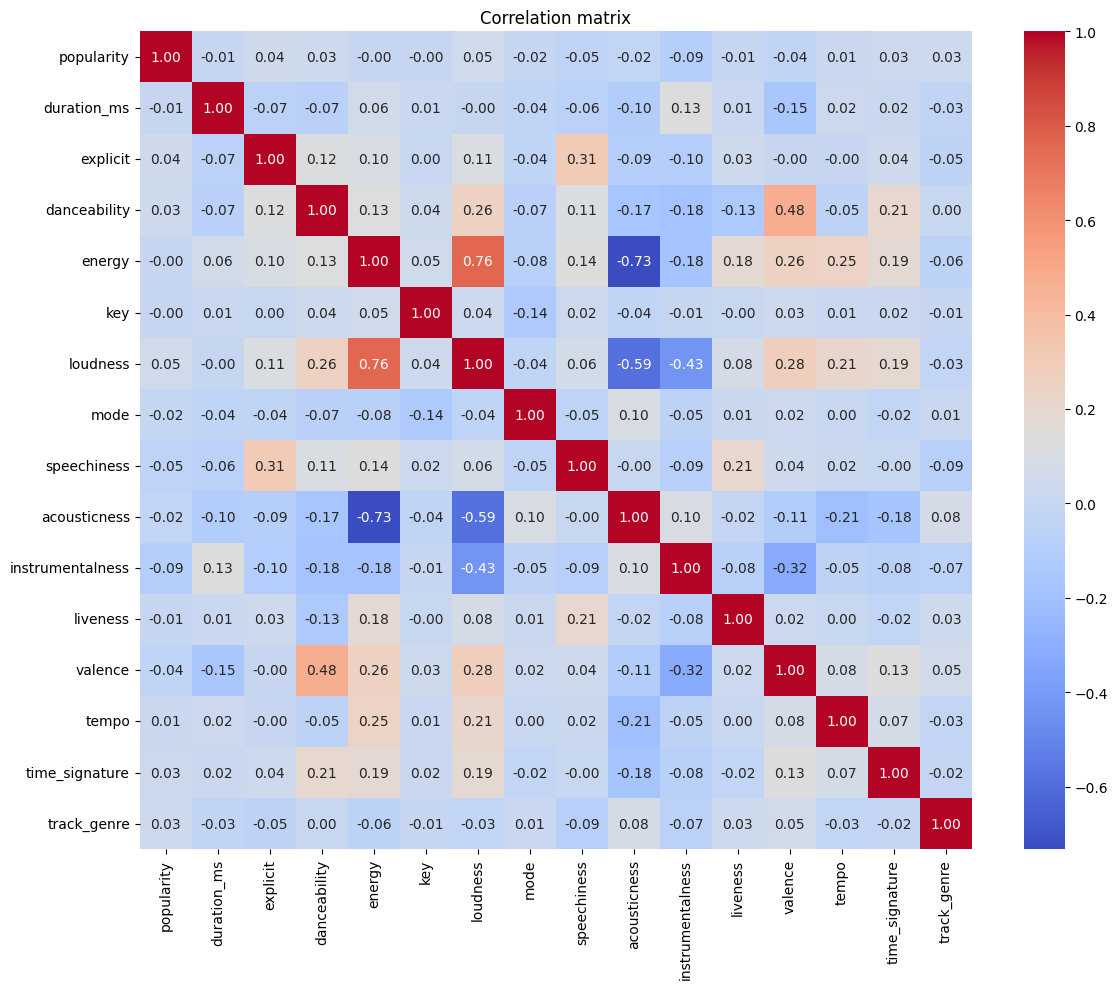

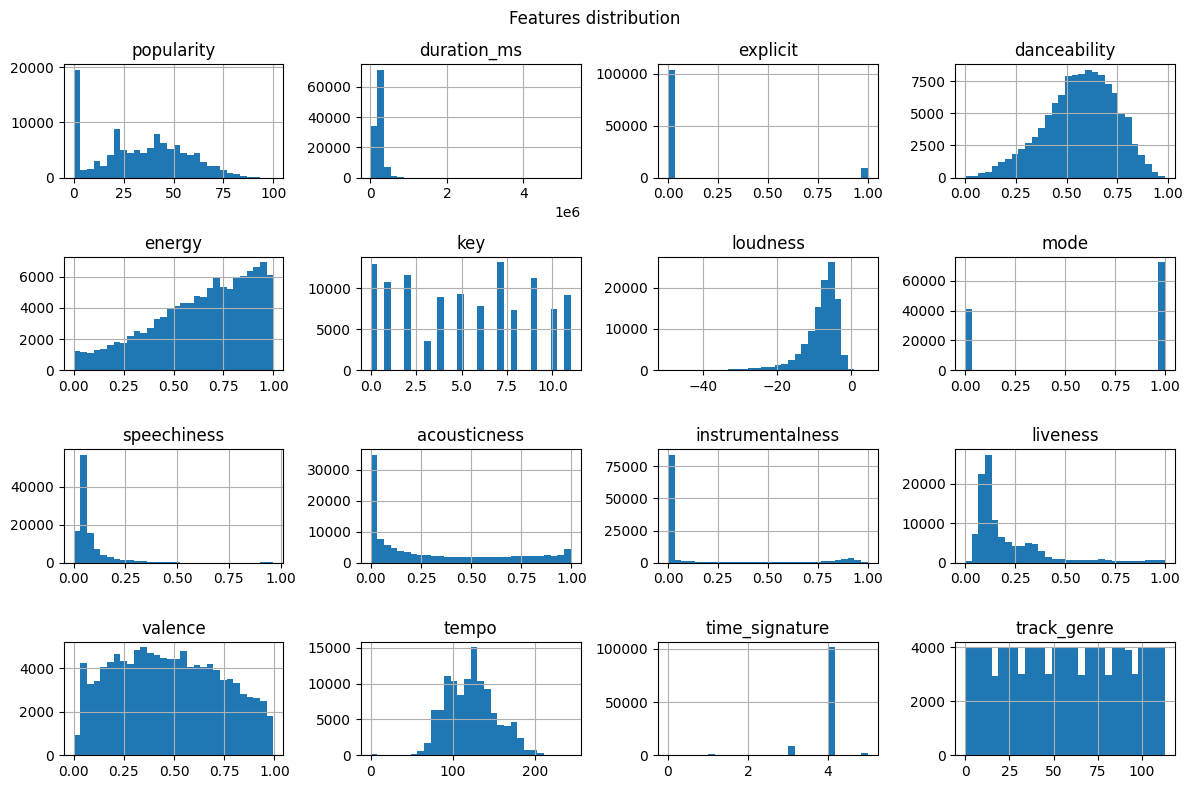

In [118]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

cols =  numeric_df.columns
numeric_df[cols].hist(bins=30, figsize=(12, 8))
plt.suptitle("Features distribution")
plt.tight_layout()
plt.show()

**Popularity**

The distribution is biased toward lower values, suggesting that the dataset contains many less known or rarely played tracks.
There is no strong correlation between popularity and any other variable. This suggests that popularity is largely independent of audio features.

**Loudness, Energy, Acousticness, and Instrumentalness**

Loudness is strongly correlated with:

- Energy (0.76): energetic tracks tend to be louder.

- Acousticness (-0.59) and Instrumentalness (-0.43): those tracks are typically softer.

Loud tracks are generally energetic, not acoustic, and rarely instrumental. The later is interesting since there is a lot of eletronic songs, this is a dataset bias that we explain later.

**Danceability**

Danceability is positively correlated with:

- Valence (0.48): happy songs tend to be more danceable.

- Loudness (0.26) and Energy (0.26): danceable music is usually louder and more energetic.

Danceable songs tend to be happy, energetic, and loud.

**Speechiness**

Speechiness is correlated with:

- Explicit (0.31): tracks with more spoken content are more likely to contain explicit lyrics.

- Liveness (0.21): live recordings may include spoken segments or interactions with the audience.

Speechy tracks are more likely to be explicit and performed live.


**Mode and Key**

Both show very low or no correlation with other features.

Mode is weakly correlated with Acousticness (0.10), this might be caused by minor keys. It is interesting that there is no correlation with the Valence.
Key appears to have no meaningful relationship with other features and could be discarded.

These features might be useless.

**Tempo**

Tempo correlates with Energy (0.25) and Valence (0.13)

Faster tracks tend to be more energetic and a bit positive.

Also, Tempo values equal to zero likely represent invalid or missing data and should be removed.

**Time Signature**

This feature shows very low variance, with a strong dominance of 4/4 time and very few instances of 3/4.

All values are in x/4 format meaning there is no representation of compound meters such as 6/8 or 9/8.

Time signature does not capture complex rythme (ternary,...) and provides no discriminative power. We could remove it.

**Track Genre**

The genre distribution appears relatively balanced across classes.
There are no strong correlations between genre and other features, which is expected for a well balanced classification task.
It suggests that genres in the dataset are not trivially predictable and reflects realistic musical complexity.

In [119]:
import numpy as np
print(np.sort(numeric_df['tempo'].unique()))
numeric_df = numeric_df[numeric_df['tempo'] != 0]
numeric_df = numeric_df.drop(columns=['time_signature', 'mode', 'key', 'popularity'])
numeric_df

[  0.     30.2    30.322 ... 220.525 222.605 243.372]


,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,230666,0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,0
1,149610,0,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,0
2,210826,0,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,0
3,201933,0,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,0
4,198853,0,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,0
...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0,0.172,0.2350,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,113
113996,385000,0,0.174,0.1170,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,113
113997,271466,0,0.629,0.3290,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,113
113998,283893,0,0.587,0.5060,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,113


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Séparation des features numériques et de la cible
X = numeric_df.copy()
y = numeric_df['track_genre']  # remplace par 'explicit' si besoin

# Encodage des labels (texte → entiers)


# Split train / validation (stratifié)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# (Optionnel) Standardisation – utile pour certains modèles (SVM, MLP, kNN)
# Ici on ne l’utilise pas car RandomForest ne la nécessite pas.
# Si tu veux tester un modèle linéaire plus tard, utilise ceci :
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

# Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=le.classes_))


                   precision    recall  f1-score   support

         acoustic       0.99      1.00      1.00       200
         afrobeat       0.98      0.99      0.99       200
         alt-rock       0.87      0.83      0.85       200
      alternative       0.82      0.87      0.85       200
          ambient       0.94      0.99      0.97       199
            anime       0.92      0.90      0.91       200
      black-metal       0.97      0.96      0.97       199
        bluegrass       0.95      0.97      0.96       199
            blues       0.87      0.85      0.86       200
           brazil       0.82      0.88      0.85       200
        breakbeat       0.92      0.93      0.92       200
          british       0.85      0.76      0.80       200
         cantopop       0.96      0.94      0.95       200
    chicago-house       0.97      0.97      0.97       200
         children       0.90      0.87      0.89       200
            chill       0.87      0.89      0.88       

In [121]:
# print(le.classes_)
print(classification_report(y_val, y_pred, target_names=le.classes_))


                   precision    recall  f1-score   support

         acoustic       0.99      1.00      1.00       200
         afrobeat       0.98      0.99      0.99       200
         alt-rock       0.87      0.83      0.85       200
      alternative       0.82      0.87      0.85       200
          ambient       0.94      0.99      0.97       199
            anime       0.92      0.90      0.91       200
      black-metal       0.97      0.96      0.97       199
        bluegrass       0.95      0.97      0.96       199
            blues       0.87      0.85      0.86       200
           brazil       0.82      0.88      0.85       200
        breakbeat       0.92      0.93      0.92       200
          british       0.85      0.76      0.80       200
         cantopop       0.96      0.94      0.95       200
    chicago-house       0.97      0.97      0.97       200
         children       0.90      0.87      0.89       200
            chill       0.87      0.89      0.88       

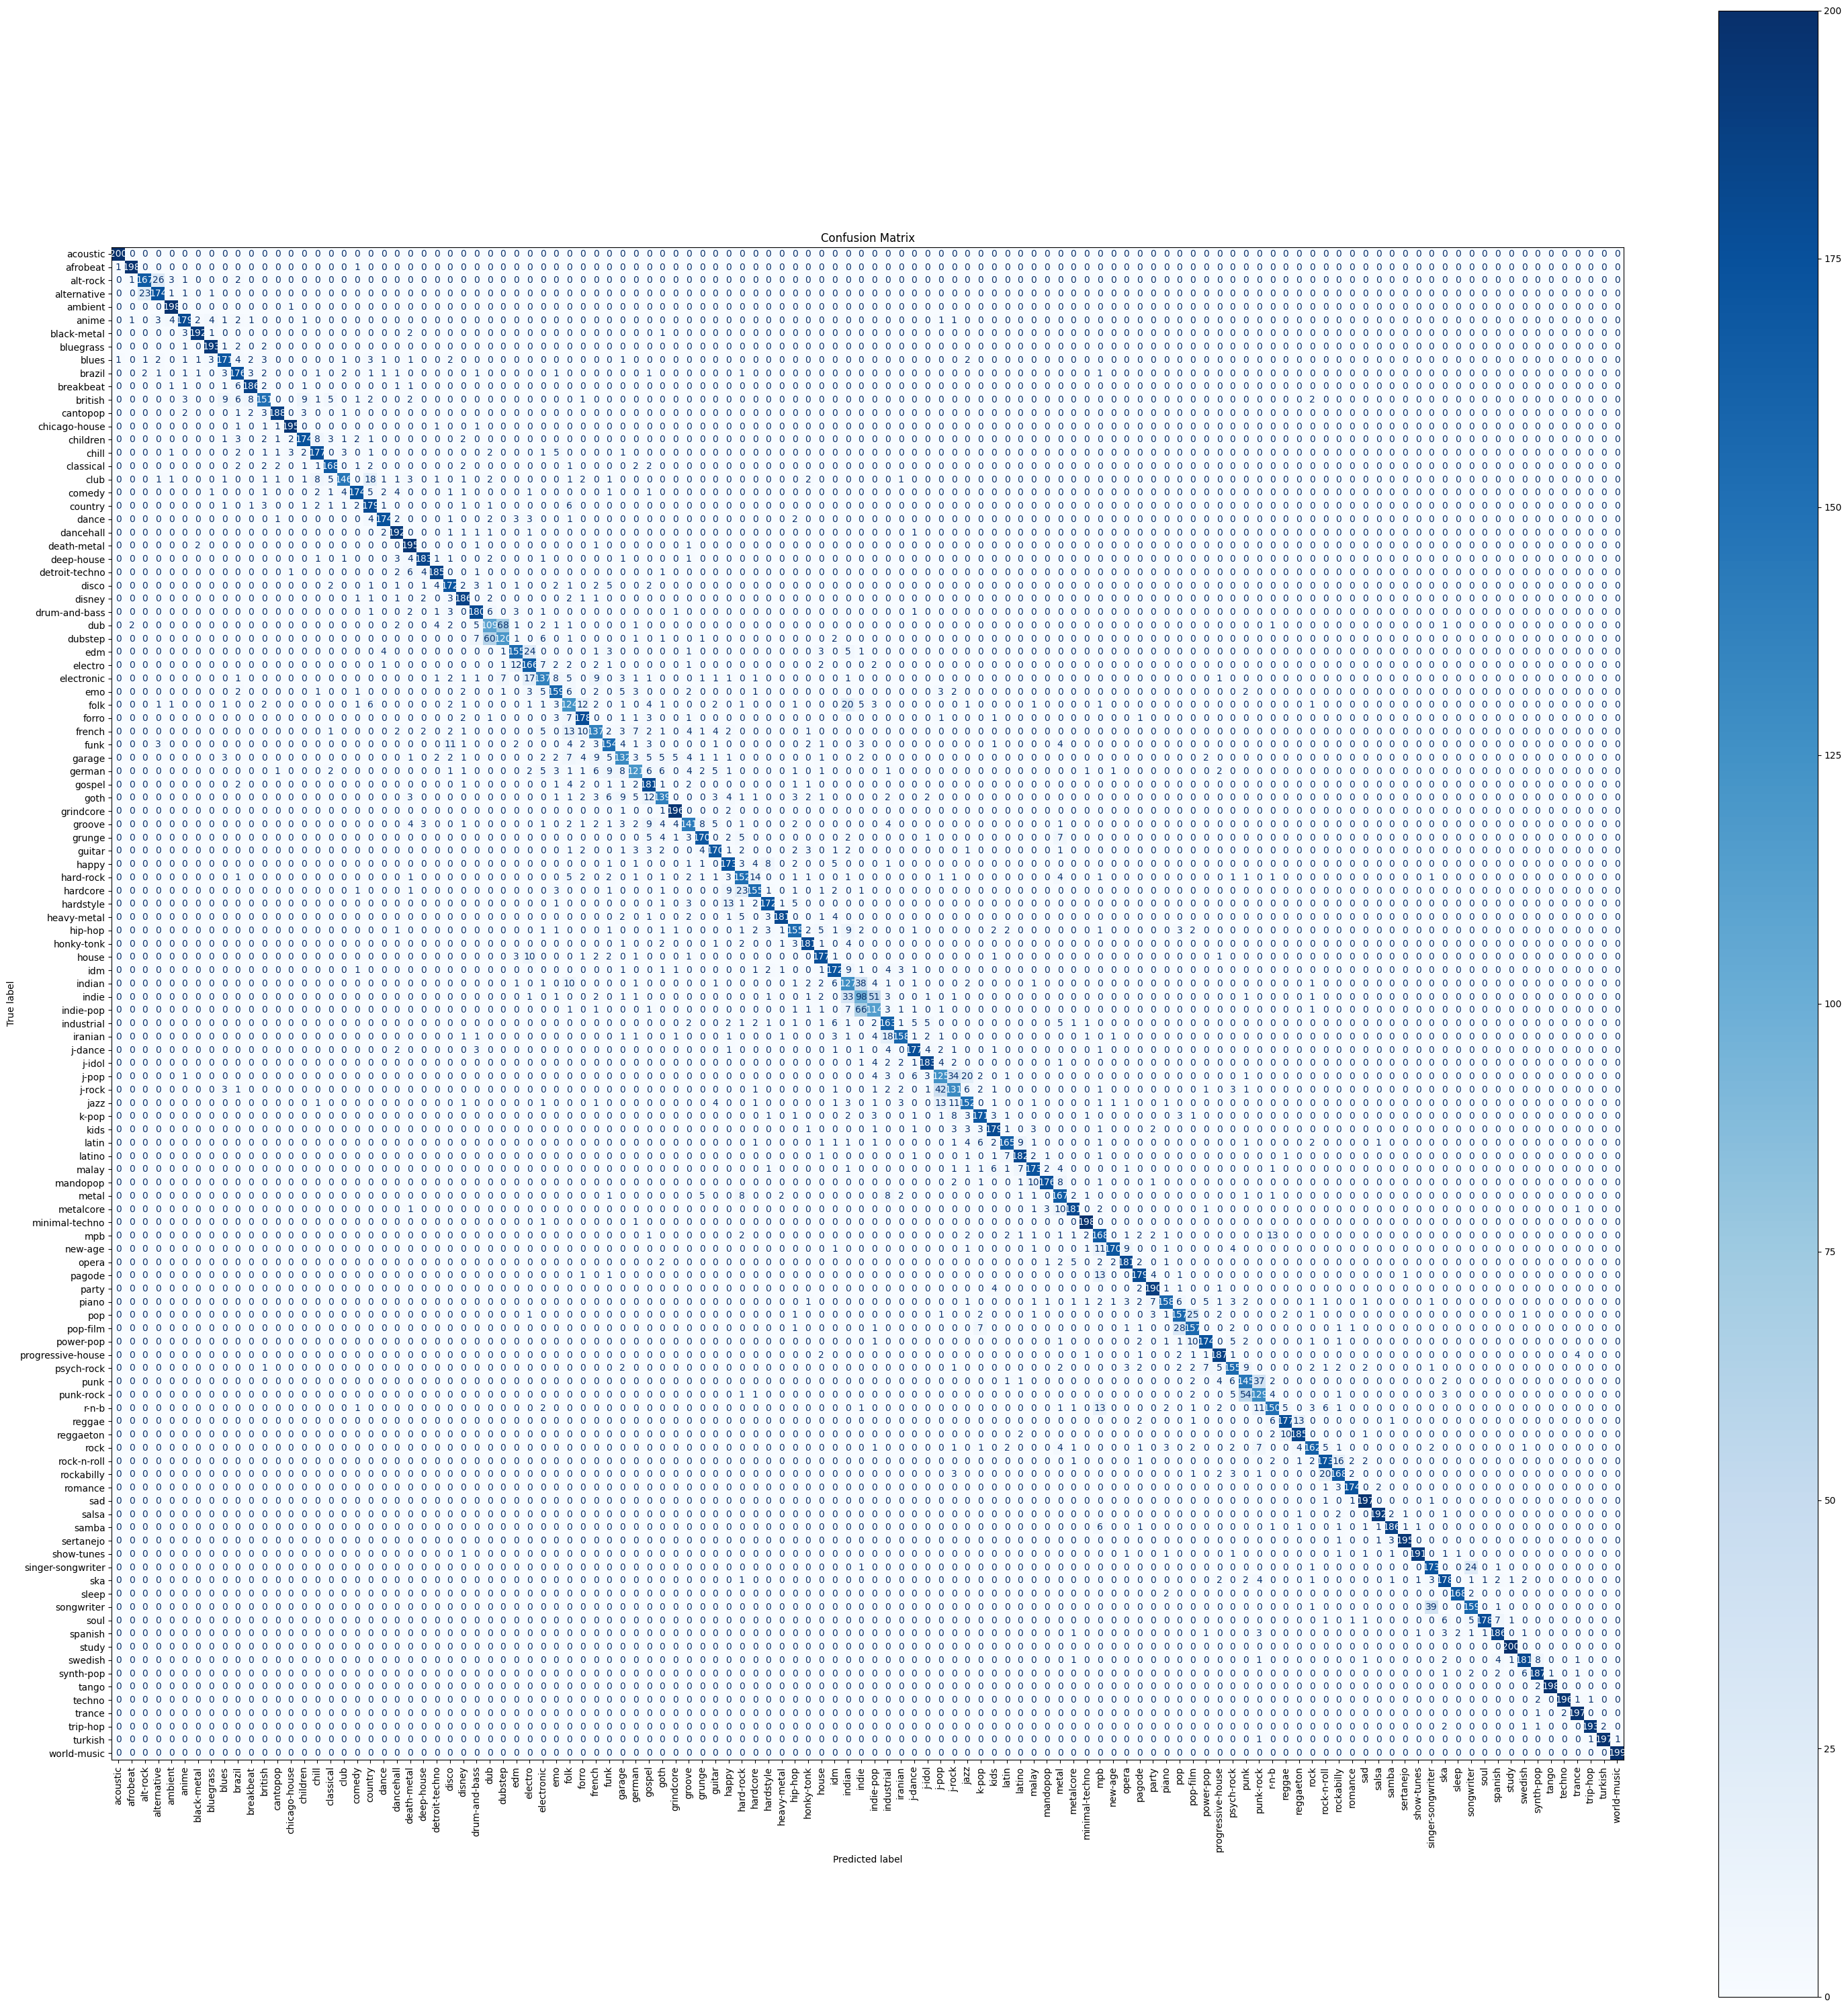

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrice de confusion brute
cm = confusion_matrix(y_val, y_pred)

# Affichage avec les noms de classes (si c'est track_genre ou autre)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(30, 30))  # adapte la taille ici
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


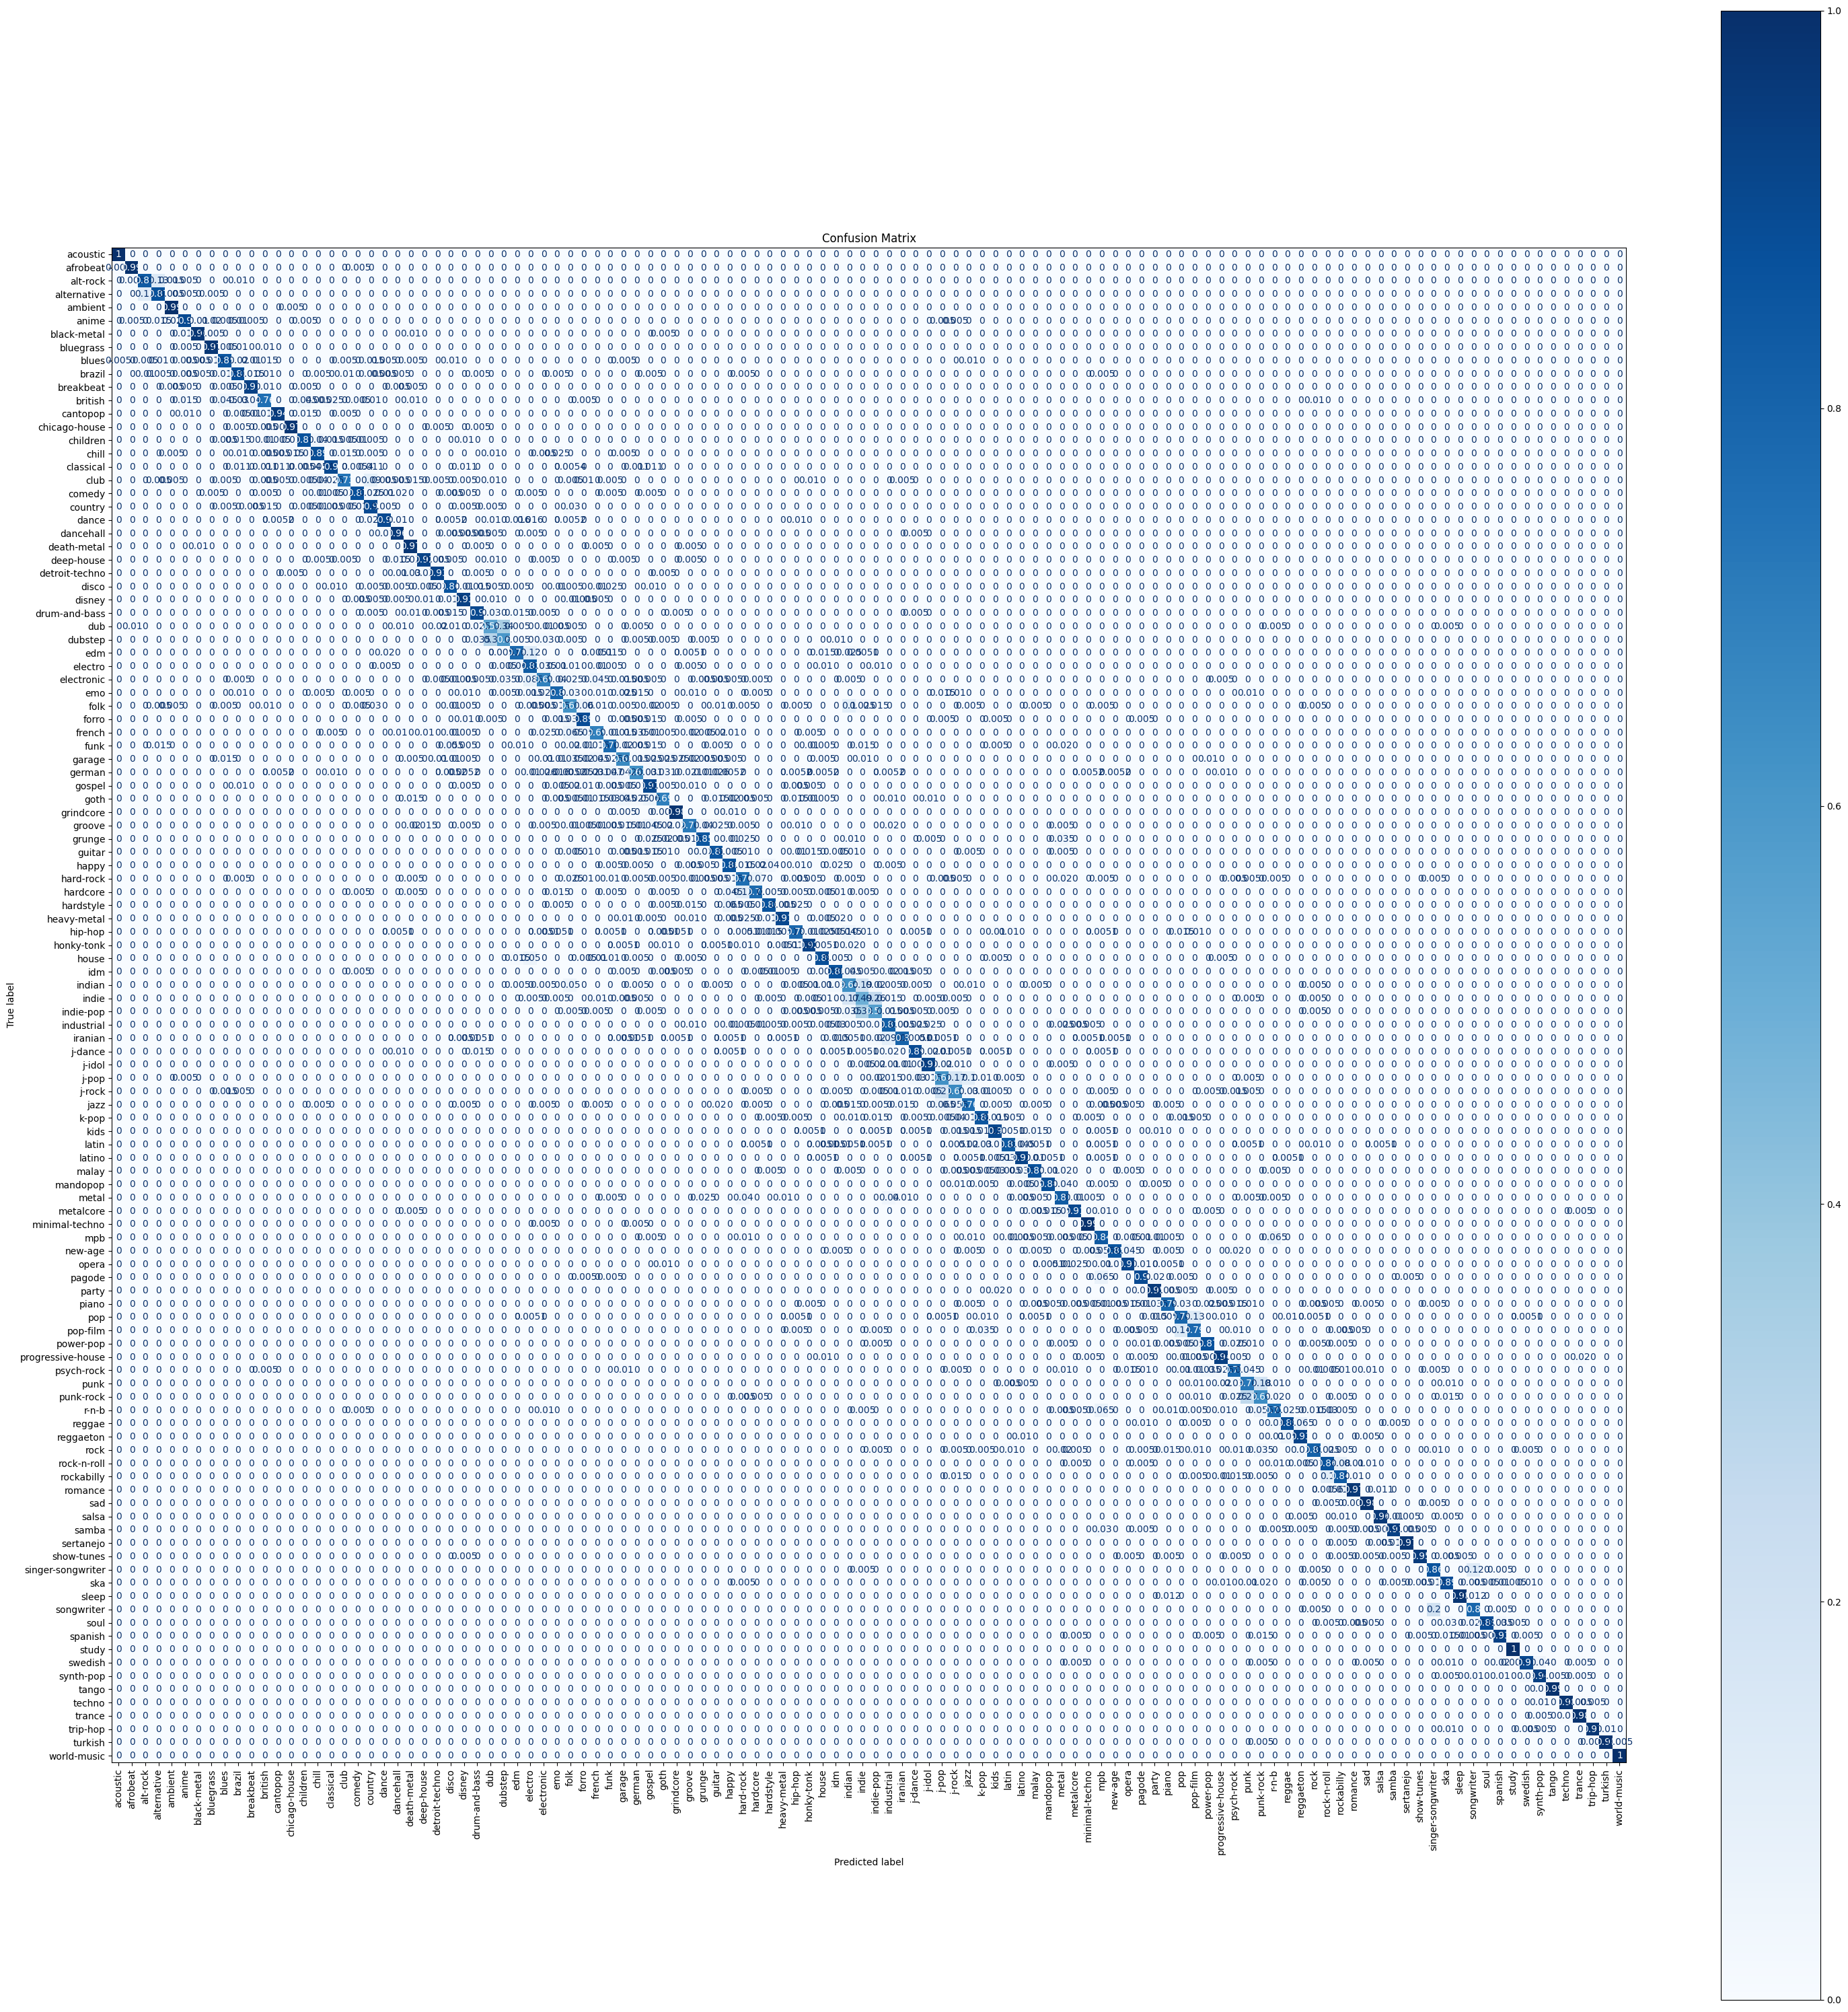

In [95]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

cm_normalized = confusion_matrix(y_val, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(30, 30))  # adapte la taille ici
disp.plot(ax=ax, xticks_rotation=90, cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [123]:
# Re-import necessary modules after kernel reset
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

# Variables assumed to be previously defined:
# y_val: true labels (encoded)
# y_pred: predicted labels (encoded)
# le: LabelEncoder used to encode y

# As kernel was reset, we need mock data to simulate (replace with real data in user's context)
# This block is for demonstration purposes and will not reflect the actual dataset

# Placeholder for what would be replaced with real values in user's session
n_classes = 100  # assuming 100 genres
y_val = np.random.randint(0, n_classes, 1000)
y_pred = y_val.copy()
np.random.seed(0)
y_pred[np.random.choice(1000, 100, replace=False)] = np.random.randint(0, n_classes, 100)

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# le.classes_ = np.array([f"genre_{i}" for i in range(n_classes)])

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred, normalize='true')

# Remove the diagonal
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

# Extract most confused pairs
confused_pairs = []
for i in range(n_classes):
    for j in range(n_classes):
        if i != j and cm_no_diag[i, j] > 0:
            confused_pairs.append((le.classes_[i], le.classes_[j], cm_no_diag[i, j]))

confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x[2], reverse=True)

# Convert to DataFrame
df_confusions = pd.DataFrame(confused_pairs_sorted, columns=["True Label", "Predicted Label", "Confusion Rate"])

# import ace_tools as tools tools.display_dataframe_to_user(name="Most Confused Genre Pairs", dataframe=df_confusions.head(30))
df_confusions


,True Label,Predicted Label,Confusion Rate
0,blues,new-age,0.200000
1,chicago-house,acoustic,0.166667
2,mandopop,house,0.166667
3,rock,dancehall,0.166667
4,rock,industrial,0.166667
...,...,...,...
93,k-pop,power-pop,0.066667
94,metal,german,0.062500
95,metal,k-pop,0.062500
96,pop-film,acoustic,0.058824


In [26]:
df[df['time_signature'] == 1]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
117,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.664,0.0755,10,-19.836,1,0.0389,0.910,0.000000,0.1640,0.57500,80.004,1,acoustic
186,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.550,0.4990,4,-9.502,1,0.0338,0.472,0.000002,0.0798,0.14400,86.966,1,acoustic
248,6OCsvPU6P84wJ0erggCRv4,Albert King,pov: you have a holly jolly christmas,Christmas Comes But Once A Year,0,272640,False,0.687,0.4940,1,-9.421,1,0.0505,0.324,0.000055,0.0867,0.62100,93.269,1,acoustic
249,7qJtNgmUyzy3R86vJwk9Wp,Albert King,pov: you rock around the christmas tree,Christmas Comes But Once A Year,0,272640,False,0.687,0.4940,1,-9.421,1,0.0505,0.324,0.000055,0.0867,0.62100,93.269,1,acoustic
286,2Dz5WpEWA0vhnMmEPYiZ2y,Parachute,Losing Sleep,She Is Love,60,146066,False,0.629,0.1740,6,-9.697,1,0.1410,0.616,0.000000,0.1180,0.30500,134.295,1,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113593,6H1U6y9b0htZoSCfROkKgh,Ruido Blanco Hart,Juegos para el Cerebro - La Mejor Música Relaj...,Mejora la Memoria,25,403999,False,0.208,0.1510,4,-17.049,1,0.0493,0.994,0.967000,0.0933,0.07090,115.146,1,world-music
113686,0VI2Pe8VIcAQoGg42Zs2vA,Reiki Armonía,Sonidos de Fondo para Reiki: Gotas de Agua,"Para Reiki: Gotas de Agua, Pt. 24",25,109506,False,0.139,0.9250,10,-32.267,0,0.0474,0.131,0.992000,0.8950,0.00271,85.949,1,world-music
113791,03KJvToiQ5xkTvgii0iVuJ,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 1",23,421000,False,0.196,0.1260,2,-15.217,1,0.0306,0.976,0.905000,0.0639,0.07960,99.783,1,world-music
113819,0MGaMJckimN7NUtJNofC02,Agua Mantra,"Salida del Sol: Poder del Cerebro, Musica para...",Eternidad,22,370999,False,0.165,0.1460,0,-23.202,1,0.0426,0.972,0.264000,0.2290,0.05520,93.777,1,world-music


We can question the dataset since if we take teh techno tracks, this is not really relevant, especially if we listen to them

In [65]:
df[df['track_genre'] == 'techno']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
109000,2vXKRlJBXyOcvZYTdNeckS,Gesaffelstein;The Weeknd,Hyperion,Lost in the Fire (feat. The Weeknd),85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.093300,0.000927,0.1150,0.1660,100.966,4,techno
109001,0b6wdul3A5sQNpIOv03OxP,Duke Dumont,Ocean Drive,Ocean Drive,72,206320,False,0.686,0.718,8,-5.054,0,0.0431,0.006370,0.000703,0.1190,0.5570,115.026,4,techno
109002,0zoGVO4bQXG8U6ChKwNgeg,Taeko Onuki,MIGNONNE (Mastered by Bernie Grundman),4:00A.M.,70,336960,False,0.631,0.644,10,-10.810,0,0.0348,0.341000,0.000411,0.0877,0.8610,103.376,4,techno
109003,6uBhi9gBXWjanegOb2Phh0,Zedd;Alessia Cara,Stay,Stay,76,210090,False,0.690,0.622,5,-5.025,0,0.0622,0.253000,0.000000,0.1160,0.5440,102.040,4,techno
109004,5aUSEPNd3m5xliFK4pn5mU,Zedd;Kehlani,Good Thing (with Kehlani),Good Thing (with Kehlani),68,210901,True,0.693,0.564,1,-3.857,0,0.0378,0.399000,0.000000,0.0409,0.5740,185.913,3,techno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1910z5NqrGoJ8SuKWNu19D,Scooter,I Want You to Stream!,Bora Bora Bora - Live,25,230250,False,0.726,0.875,9,-5.957,0,0.1930,0.203000,0.001510,0.5680,0.5230,139.955,4,techno
109996,2MgcPgxFvAlJCVITsEghCI,Ruffneck;Yavahn;Sharam Jey;Kolombo,Everybody Be Somebody: All The Classics And...,"Everybody Be Somebody - Sharam Jey, Kolombo Remix",24,252524,False,0.875,0.511,6,-6.677,0,0.0474,0.204000,0.044500,0.1390,0.5870,122.169,4,techno
109997,3Rn21K5Te3TUM0AcFtisuX,Marshall Masters,Thunderdome Die Hard II (Digital Version),Return To Zero - The Mystery Land Anthem,25,120110,False,0.679,0.866,8,-9.691,1,0.0719,0.000038,0.755000,0.9560,0.0457,147.086,4,techno
109998,3P5xhGZ3c9tOmyvpiTAvVn,Paul Elstak,b2s Presents Paul Elstak,The Dj’s Pumping - Freestyle Edit,24,179175,False,0.602,0.933,10,-4.886,1,0.0471,0.001720,0.032500,0.3720,0.5190,150.047,4,techno
